# Prediction visualisations

In [1]:
import torch
from torch.utils.data import DataLoader

In [2]:
import sys
sys.path.remove('/home/lh/projects/cost-gcn')
sys.path

['/home/lh/projects/co3d/notebooks',
 '/opt/anaconda/lib/python38.zip',
 '/opt/anaconda/lib/python3.8',
 '/opt/anaconda/lib/python3.8/lib-dynload',
 '',
 '/home/lh/.local/lib/python3.8/site-packages',
 '/opt/anaconda/lib/python3.8/site-packages',
 '/home/lh/projects/co3d',
 '/opt/anaconda/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg',
 '/home/lh/.local/lib/python3.8/site-packages/IPython/extensions',
 '/home/lh/.ipython']

# Poolsize: 1

In [3]:
# Get dataloader
from ride.utils.env import DATASETS_PATH
from datasets.dataloader import train_val_test

kwargs = {'data_path': '/home/lh/datasets/thumos14/data', 'annotation_path': '/home/lh/datasets/thumos14/splits', 'frames_per_clip': 483, 'step_between_clips': 400, 'temporal_downsampling': 6, 'fold': 1, 'val_split_pct': 0.15, 'image_size': 160, 'test_ensemble': 0, 'test_ensemble_temporal_clips': 10, 'test_ensemble_spatial_sampling_strategy': 'center', 'normalisation_style': 'feichtenhofer', 'rand_augment_magnitude': 7, 'rand_augment_num_layers': 2}


train_ds, val_ds, test_ds = train_val_test(**kwargs)

ride: Environment:
  CACHE_PATH: .cache
  DATASETS_PATH: /home/lh/datasets
  LOGS_PATH: /mnt/archive/lh/hags/logs
  LOG_LEVEL: DEBUG
  NUM_CPU: '104'
  RUN_LOGS_PATH: /mnt/archive/lh/hags/logs/run_logs
  TUNE_LOGS_PATH: /mnt/archive/lh/hags/logs/tune_logs

/home/lh/.local/lib/python3.8/site-packages/torchvision/transforms/_functional_video.py:5: UserWarning: The _functional_video module is deprecated. Please use the functional module instead.
  warnings.warn(
/home/lh/.local/lib/python3.8/site-packages/torchvision/transforms/_transforms_video.py:25: UserWarning: The _transforms_video module is deprecated. Please use the transforms module instead.
  warnings.warn(
datasets: Using validation set for training as is customary for THUMOS14 Action Detection.


In [4]:
x, y, i = test_ds[0]
x.shape, y, i

(torch.Size([3, 483, 160, 160]),
 tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3,
          3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          0,  0,  0,  0,  0,  0,  0,  0, 21, 21, 21, 21,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  3,  3,  3,  3,  3,  3,  3,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          3,  3,  3,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3,
          3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3,  3,  3,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [5]:
ys = [test_ds[i][1] for i in range(4)]

In [6]:
# Load extracted features
import pickle

fpath = "/mnt/archive/lh/hags/logs/run_logs/unnamed/version_457/features/test/module_head_projection.pickle"
with open(fpath, "rb") as f:
    feat = pickle.load(f)

In [7]:
# The loaded features constitue init frames and then predicted frames
[f.shape for f in feat]

[(22, 55, 1, 1),
 (22, 55, 1, 1),
 (22, 400, 1, 1),
 (22, 400, 1, 1),
 (22, 55, 1, 1),
 (22, 55, 1, 1),
 (22, 400, 1, 1),
 (22, 400, 1, 1),
 (22, 55, 1, 1),
 (22, 55, 1, 1),
 (22, 400, 1, 1),
 (22, 400, 1, 1),
 (22, 55, 1, 1),
 (22, 55, 1, 1),
 (22, 400, 1, 1),
 (22, 400, 1, 1),
 (22, 55, 1, 1),
 (22, 55, 1, 1),
 (22, 400, 1, 1),
 (22, 400, 1, 1),
 (22, 55, 1, 1),
 (22, 55, 1, 1),
 (22, 400, 1, 1),
 (22, 400, 1, 1),
 (22, 55, 1, 1),
 (22, 55, 1, 1),
 (22, 400, 1, 1),
 (22, 400, 1, 1),
 (22, 55, 1, 1),
 (22, 55, 1, 1),
 (22, 400, 1, 1),
 (22, 400, 1, 1),
 (22, 55, 1, 1),
 (22, 55, 1, 1),
 (22, 400, 1, 1),
 (22, 400, 1, 1),
 (22, 55, 1, 1),
 (22, 55, 1, 1),
 (22, 400, 1, 1),
 (22, 400, 1, 1)]

In [7]:
# Clean
feat = [f.squeeze() for f in feat if f.shape[1] != 55]

In [8]:
[f.shape for f in feat]

[(22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400),
 (22, 400)]

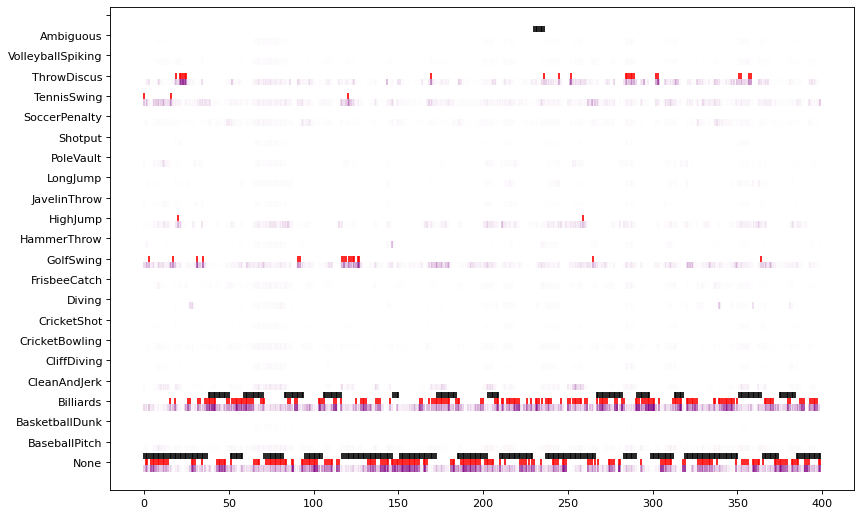

In [62]:
import matplotlib.pyplot as plt
import numpy as np

idx = 1
preds = feat[idx]
preds = torch.nn.functional.softmax(torch.tensor(preds), dim=0)

# Average preds
# window_size = 1
# preds_avg = preds[:,:-window_size]
# for w in range(1, window_size):
#     preds_avg = preds_avg + preds[:,w:-(window_size-w)]
# preds_avg = preds_avg / window_size
# preds = preds_avg
C, N = preds.shape

targets = ys[idx]
targets = targets[-N:]

colors = np.random.rand(N)

y_shift = 0.3
marker = "|"

plt.figure(figsize=(12, 8), dpi=80)
plt.yticks(range(C), test_ds.classes)
plt.yticks(range(N))

plt.scatter(range(N), targets + y_shift, color="black", alpha=1, marker=marker)

plt.scatter(range(N), preds.argmax(0), color="red", alpha=1, marker=marker)
for c in range(C):
    plt.scatter(range(N), [c - y_shift for _ in range(N)] , color="purple", alpha=preds[c], marker=marker)

plt.show()

In [63]:
from metrics.calibrated_average_precision import mean_calibrated_average_precision

# C, N = preds.shape
mean_calibrated_average_precision(preds.permute(1,0), targets, skip_classes=[0,21])[:2]  # mAP, mcAP

(0.4142929685354868, 0.5978247725242923)

# Pooling size 5

In [97]:
# Get dataloader
from ride.utils.env import DATASETS_PATH
from datasets.dataloader import train_val_test

kwargs = {'data_path': '/home/lh/datasets/thumos14/data', 'annotation_path': '/home/lh/datasets/thumos14/splits', 'frames_per_clip': 200+127, 'step_between_clips': 200+64, 'temporal_downsampling': 6, 'fold': 1, 'val_split_pct': 0.15, 'image_size': 160, 'test_ensemble': 0, 'test_ensemble_temporal_clips': 10, 'test_ensemble_spatial_sampling_strategy': 'center', 'normalisation_style': 'feichtenhofer', 'rand_augment_magnitude': 7, 'rand_augment_num_layers': 2}


train_ds, val_ds, test_ds = train_val_test(**kwargs)

ys = [test_ds[i][1] for i in range(10)]

In [98]:
# Load extracted features
import pickle

fpath = "/mnt/archive/lh/hags/logs/run_logs/wandb/run-20211014_081240-2fh3xwf9/features/test/module_head_projection.pickle"
with open(fpath, "rb") as f:
    feat = pickle.load(f)
    
# Clean
feat = [f.squeeze() for f in feat if f.shape[1] != 31]
[f.shape for f in feat]

[(22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264)]

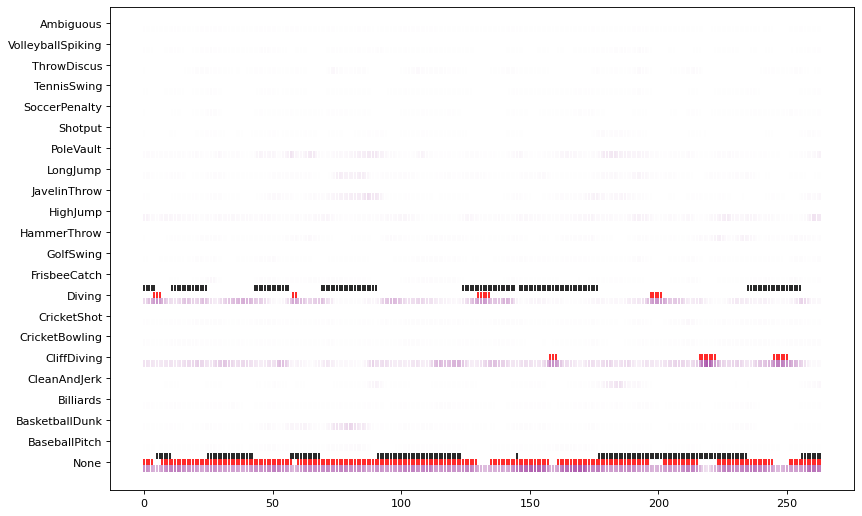

In [101]:
# Visualise
import matplotlib.pyplot as plt
import numpy as np

idx = 4
preds = feat[idx]
preds = torch.nn.functional.softmax(torch.tensor(preds), dim=0)

# Average preds
# window_size = 1
# preds_avg = preds[:,:-window_size]
# for w in range(1, window_size):
#     preds_avg = preds_avg + preds[:,w:-(window_size-w)]
# preds_avg = preds_avg / window_size
# preds = preds_avg
C, N = preds.shape

targets = ys[idx]
targets = targets[-N:]

colors = np.random.rand(N)

y_shift = 0.3
marker = "|"

plt.figure(figsize=(12, 8), dpi=80)
plt.yticks(range(C), test_ds.classes)
plt.yticks(range(N))

plt.scatter(range(N), targets + y_shift, color="black", alpha=1, marker=marker)

plt.scatter(range(N), preds.argmax(0), color="red", alpha=1, marker=marker)
for c in range(C):
    plt.scatter(range(N), [c - y_shift for _ in range(N)] , color="purple", alpha=preds[c], marker=marker)

plt.show()

In [102]:
from metrics.calibrated_average_precision import mean_calibrated_average_precision

# C, N = preds.shape
mean_calibrated_average_precision(preds.permute(1,0), targets, skip_classes=[0,21])[:2]  # mAP, mcAP

(0.41270120564091417, 0.42739399378803716)

# Pooling size 64

In [79]:
# Get dataloader
from ride.utils.env import DATASETS_PATH
from datasets.dataloader import train_val_test

kwargs = {'data_path': '/home/lh/datasets/thumos14/data', 'annotation_path': '/home/lh/datasets/thumos14/splits', 'frames_per_clip': 200+183, 'step_between_clips': 200+64, 'temporal_downsampling': 6, 'fold': 1, 'val_split_pct': 0.15, 'image_size': 160, 'test_ensemble': 0, 'test_ensemble_temporal_clips': 10, 'test_ensemble_spatial_sampling_strategy': 'center', 'normalisation_style': 'feichtenhofer', 'rand_augment_magnitude': 7, 'rand_augment_num_layers': 2}


train_ds, val_ds, test_ds = train_val_test(**kwargs)

ys = [test_ds[i][1] for i in range(10)]

In [74]:
# Load extracted features
import pickle

fpath = "/mnt/archive/lh/hags/logs/run_logs/wandb/run-20211014_075921-pun7xcr9/features/test/module_head_projection.pickle"
with open(fpath, "rb") as f:
    feat = pickle.load(f)
    
# Clean
feat = [f.squeeze() for f in feat if f.shape[1] != 28]
[f.shape for f in feat]

[(22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264),
 (22, 264)]

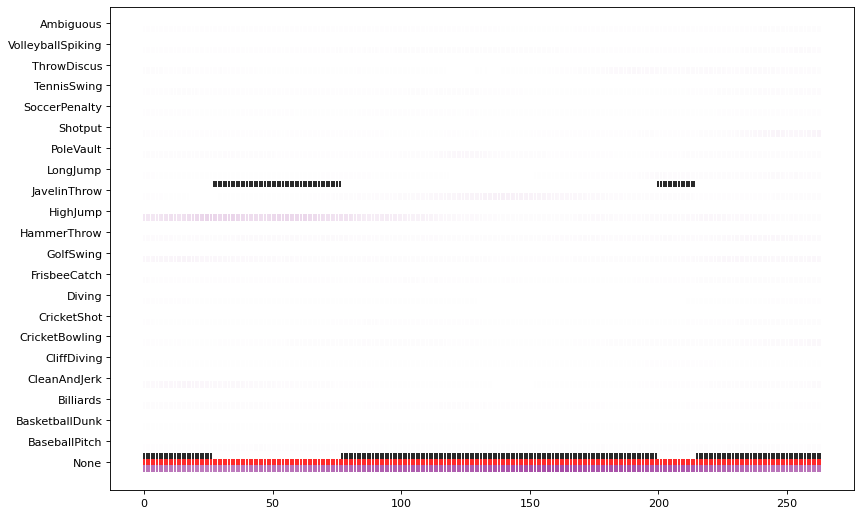

In [85]:
# Visualise
import matplotlib.pyplot as plt
import numpy as np

idx = 8
preds = feat[idx]
preds = torch.nn.functional.softmax(torch.tensor(preds), dim=0)

# Average preds
# window_size = 1
# preds_avg = preds[:,:-window_size]
# for w in range(1, window_size):
#     preds_avg = preds_avg + preds[:,w:-(window_size-w)]
# preds_avg = preds_avg / window_size
# preds = preds_avg
C, N = preds.shape

targets = ys[idx]
targets = targets[-N:]

colors = np.random.rand(N)

y_shift = 0.3
marker = "|"

plt.figure(figsize=(12, 8), dpi=80)
plt.yticks(range(C), test_ds.classes)
plt.yticks(range(N))

plt.scatter(range(N), targets + y_shift, color="black", alpha=1, marker=marker)

plt.scatter(range(N), preds.argmax(0), color="red", alpha=1, marker=marker)
for c in range(C):
    plt.scatter(range(N), [c - y_shift for _ in range(N)] , color="purple", alpha=preds[c], marker=marker)

plt.show()

In [89]:
from metrics.calibrated_average_precision import mean_calibrated_average_precision

# C, N = preds.shape
mean_calibrated_average_precision(preds.permute(1,0), targets, skip_classes=[0,21])[:2]  # mAP, mcAP

(0.1512704484633828, 0.3388726662261619)